# Problem Statement
## Prepare a prediction model for profit of 50_startups data.
###### * Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.
### Features

* R&D Spend -- Research and devolop spend in the past few years

* Administration -- spend on administration in the past few years

* Marketing Spend -- spend on Marketing in the past few years

* State -- states from which data is collected

* Profit -- profit of each state in the past few years

## Importing Libraries

In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##  Importing Data

In [39]:
stsrtups_new = pd.read_csv('50_Startups.csv')
stsrtups_new.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [40]:
stsrtups_new.shape

(50, 5)

In [41]:
stsrtups_new.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [42]:
stsrtups_new.info() #Checking for Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### Checking duplicated data

In [43]:
stsrtups_new[stsrtups_new.duplicated()] # No duplicated Data 

,R&D Spend,Administration,Marketing Spend,State,Profit


### Checking null values

In [44]:
stsrtups_new.isnull().sum() # No Null Values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Renaming the columns name to make it short

In [45]:
df=stsrtups_new.copy()
df= df.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)
df.head()

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [46]:
df[df.values==0.0]

,RnD,admin,marketing,state,profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


### Observation: Notice there are some '0' values in the data in some features,
    here the context for Zero should be absolute Zero, no money has spend regards to that Department

## Correlation Analysis

In [47]:
df.corr()

,RnD,admin,marketing,profit
RnD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


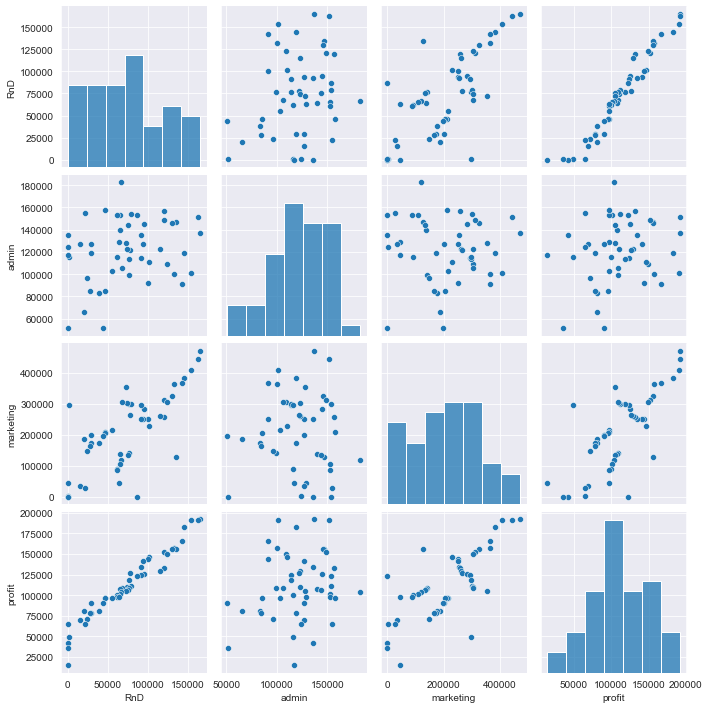

In [48]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

## Model Building

In [49]:
model = smf.ols("RnD~admin+marketing+profit",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RnD   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     284.6
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           1.06e-29
Time:                        15:47:56   Log-Likelihood:                -532.81
No. Observations:                  50   AIC:                             1074.
Df Residuals:                      46   BIC:                             1081.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.904e+04   7474.939     -7.898      0.000   -7.41e+04    -4.4e+04
admin          0.0840      0.058      1.446      0.155      -0.033       0.201
marketing      0.0052      0.020      0.264      0.793      -0.034       0.045
profit         1.0845      0.061     17.846      0.000       0.962       1.207
==============================================================================
Omnibus:                        6.269   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.578
Skew:                           0.562   Prob(JB):                       0.0615
Kurtosis:                       4.189   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Testing

In [50]:
model.params  # Finding Coefficient parameters

Intercept   -59040.495616
admin            0.083980
marketing        0.005184
profit           1.084499
dtype: float64

In [51]:
model.tvalues, np.round(model.pvalues,5)   # Finding tvalues and pvalues

(Intercept    -7.898458
 admin         1.446083
 marketing     0.264055
 profit       17.846374
 dtype: float64,
 Intercept    0.00000
 admin        0.15493
 marketing    0.79292
 profit       0.00000
 dtype: float64)

In [52]:
# Finding rsquared values
model.rsquared, model.rsquared_adj

(0.9488830971212534, 0.9455493860639439)

##### Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
##### Also find their tvalues and pvalues

In [53]:
slr_a = smf.ols("admin~profit",data=df).fit()
slr_a.tvalues, slr_a.pvalues

(Intercept    9.045265
 profit       1.419493
 dtype: float64,
 Intercept    6.083995e-12
 profit       1.622174e-01
 dtype: float64)

In [54]:
slr_m = smf.ols("profit~marketing",data=df).fit()
slr_m.tvalues, slr_a.pvalues

(Intercept    7.808356
 marketing    7.802657
 dtype: float64,
 Intercept    6.083995e-12
 profit       1.622174e-01
 dtype: float64)

In [55]:
slr_am = smf.ols("profit~admin+marketing",data=df).fit()
slr_am.tvalues, slr_a.pvalues

(Intercept    1.142741
 admin        2.467779
 marketing    8.281039
 dtype: float64,
 Intercept    6.083995e-12
 profit       1.622174e-01
 dtype: float64)

## Model Validation
### Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [56]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r = smf.ols("RnD~admin+marketing",data= df).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a = smf.ols("admin~RnD+marketing",data= df).fit().rsquared
vif_a=1/(1-rsq_r)

rsq_m = smf.ols("RnD~marketing+admin",data= df).fit().rsquared
vif_m=1/(1-rsq_r)


# Putting the values in Dataframe format
d1={'Variables':['RnD','admin','marketing'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df


,Variables,Vif
0,RnD,2.468903
1,admin,2.468903
2,marketing,2.468903


####  None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

####  2) Residual Analysis
#### Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

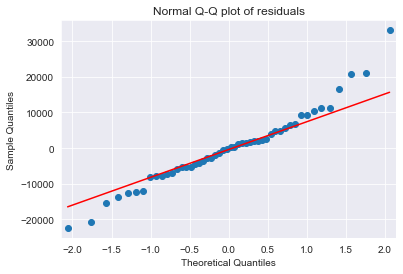

In [57]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [58]:
list(np.where(model.resid<-20000))

[array([36, 45], dtype=int64)]

####  Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

In [59]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

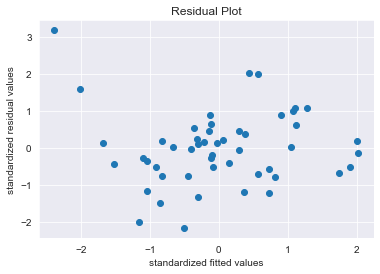

In [60]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 
                                                                                

#### Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
#### using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


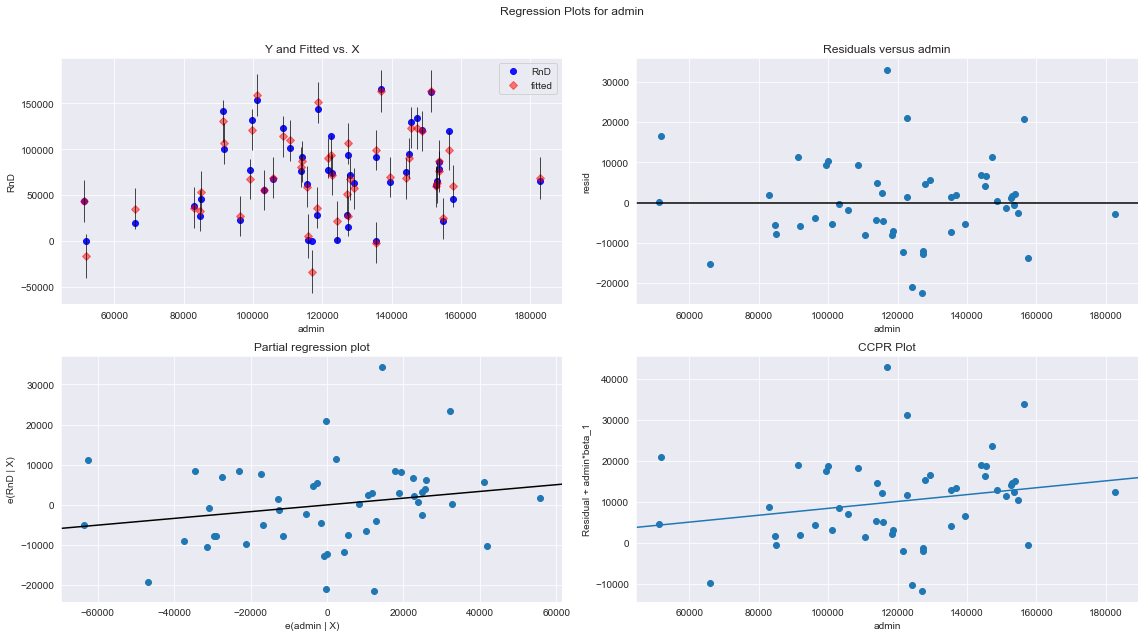

In [66]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model, 'admin', fig=fig)
plt.show()

eval_env: 1


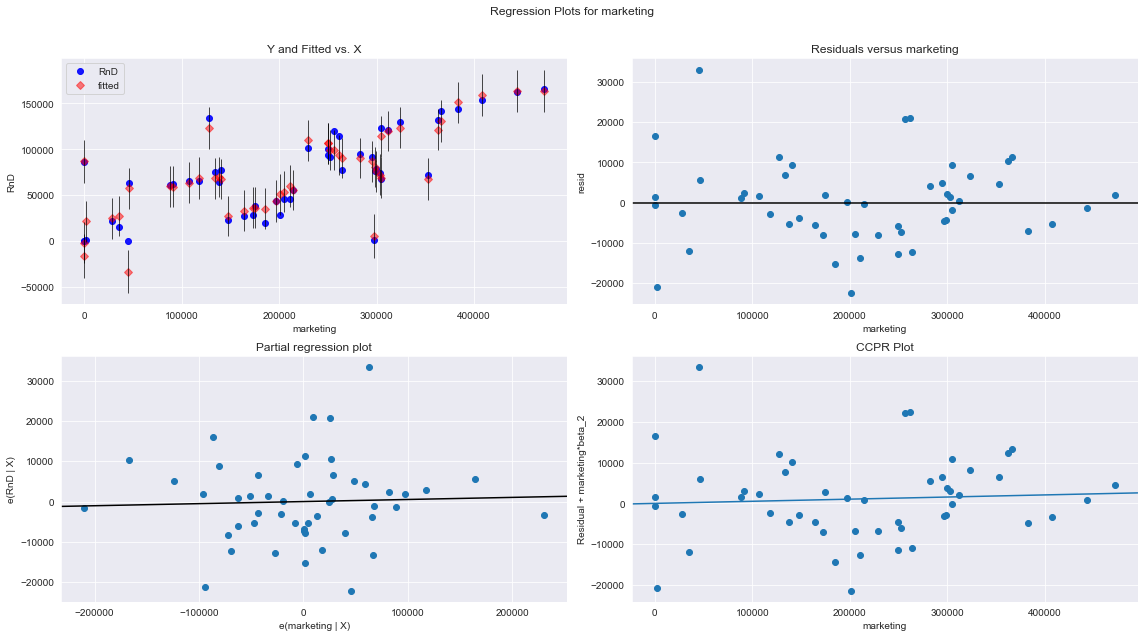

In [67]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model, 'marketing', fig=fig)
plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)
### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [69]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

(c,_)=model.get_influence().cooks_distance
c



array([1.32686152e-03, 6.71327269e-04, 1.00848450e-02, 1.08778569e-02,
       3.25214083e-02, 1.86773367e-02, 5.72671973e-02, 5.78718853e-03,
       2.22688176e-05, 9.59918619e-03, 9.20054873e-03, 6.55469646e-03,
       1.24637952e-02, 3.65502131e-03, 5.84813034e-02, 2.46132141e-02,
       8.23306628e-03, 1.88350783e-03, 1.79034854e-03, 2.23366163e-04,
       1.61212333e-03, 1.26961562e-03, 2.74140867e-04, 4.19428589e-04,
       1.14799909e-02, 2.38077433e-03, 4.73968200e-03, 6.88977976e-03,
       3.02966525e-03, 4.29665651e-04, 7.86793745e-04, 2.26839434e-04,
       6.36387230e-03, 2.68148870e-06, 3.77469670e-02, 8.06673934e-03,
       4.06994630e-02, 2.42256101e-05, 6.52120059e-02, 5.53899638e-04,
       5.88130170e-03, 4.51009245e-03, 1.71003795e-03, 2.23226893e-02,
       1.80906333e-03, 8.94962581e-02, 2.00717682e-02, 6.12418917e-04,
       2.04633830e-01, 5.14612676e-01])

###  Plot the influencers using the stem plot

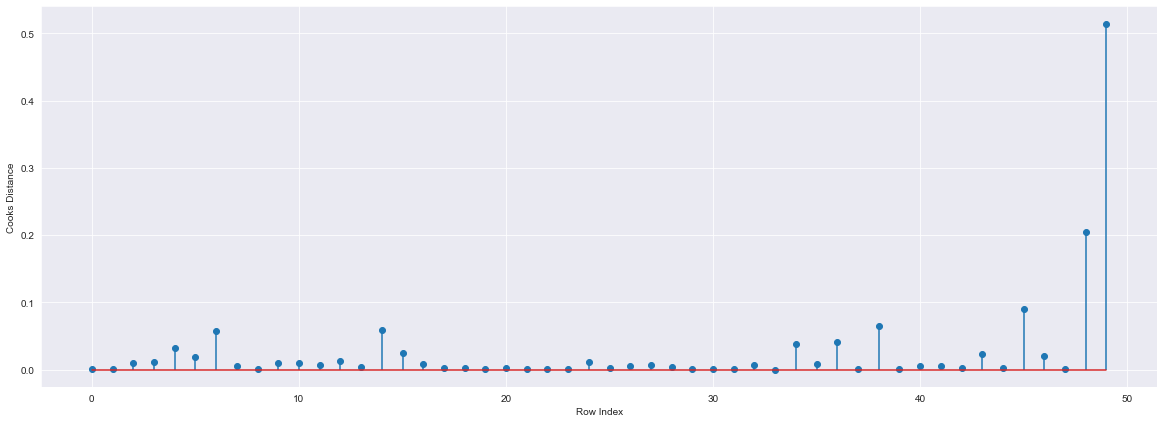

In [72]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

#### Index and value of influencer where C>0.5

In [73]:
np.argmax(c) , np.max(c)

(49, 0.5146126758750688)

####  2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

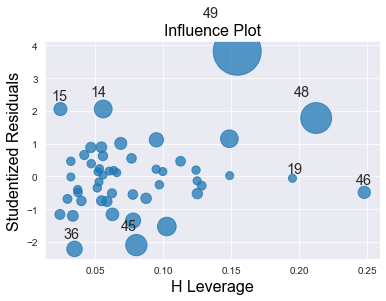

In [74]:
influence_plot(model)
plt.show()

#### Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [75]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [77]:
df[df.index.isin([49])] 

,RnD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


## Improving the Model

### Discard the data points which are influencers and reassign the row number (reset_index(drop=True))

In [79]:
data2=df.drop(df.index[[49]],axis=0).reset_index(drop=True)
data2

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Model Deletion Diagnostics and Final Model

In [82]:
while np.max(c)>0.5 :
    model=smf.ols("profit~RnD+admin+marketing",data=data2).fit()   #RnD~admin+marketing+profit
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("profit~RnD+admin+marketing",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073


In [83]:
final_model.rsquared

0.9626766170294073

In [84]:
data2

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Model Predictions

#####  say New data for prediction is

In [85]:
new_data=pd.DataFrame({'RnD':70000,"admin":90000,"marketing":140000},index=[0])
new_data

,RnD,admin,marketing
0,70000,90000,140000


In [86]:
# Manual Prediction of Price
final_model.predict(new_data)

0    111027.02823
dtype: float64

In [87]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data2)
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64

### table containing R^2 value for each prepared model

In [88]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.961316
1,Final_Model,0.962677
